In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [3]:
!head adult.data

"head" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [4]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [5]:
df = pd.read_csv('adult.data', sep = ', ', names = cols)
# df.columns = cols


C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [6]:
df.head(5)
# df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(32561, 15)

# Сколько мужчин и женщин?

In [8]:
#df['sex'].value_counts()
print('Количестов мужчин -->', df.sex[df.sex=='Male'].count())
print('Количестов женщин -->', df.sex[df.sex=='Female'].count())

Количестов мужчин --> 21790
Количестов женщин --> 10771


# Средний возраст мужчин и женщин?

In [9]:
#df[df.sex =='Male'].age.mean(), df[df.sex == 'Female'].age.mean()
print('Средний возраст мужчин --> ', df[df.sex == 'Male'].age.mean())
print('Средний возраст женщин --> ', df[df.sex == 'Female'].age.mean())

Средний возраст мужчин -->  39.43354749885268
Средний возраст женщин -->  36.85823043357163


# Какая доля граждан США (United-States) в данном датасете?

In [10]:
path = df[df['native-country'] == 'United-States']['native-country'].count() / df['native-country'].count()
print("Доля граждан США --> ", path*100,'%')

Доля граждан США -->  89.5857006848684 %


# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

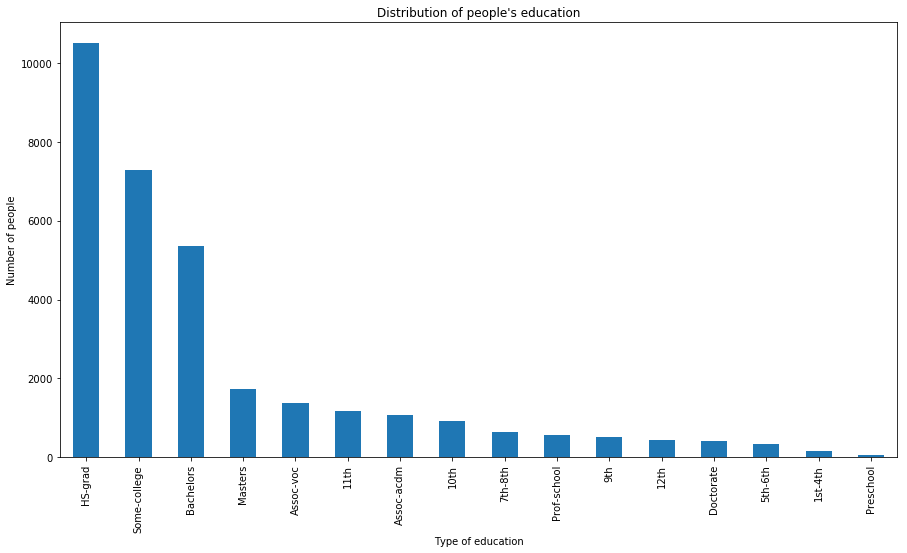

In [11]:
axarr = plt.subplots(figsize=(15, 8))
plt.xlabel('Type of education')
plt.ylabel('Number of people')
plt.title("Distribution of people's education")
df['education'].value_counts().plot.bar(ax=axarr[1])

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [12]:
print("для людей имеющих material status == divorced")
print("Среднее значение fnlwgt --> ", df[df['marital-status'] == 'Divorced'].fnlwgt.mean())
print("Среднее квадратичное отклонение fnlwgt --> ", df[df['marital-status'] == 'Divorced'].fnlwgt.std())

для людей имеющих material status == divorced
Среднее значение fnlwgt -->  185802.79045689848
Среднее квадратичное отклонение fnlwgt -->  105646.78945933603


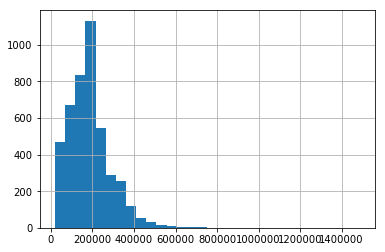

In [13]:
df[df['marital-status'] == 'Divorced'].fnlwgt.hist(bins=30)

    > Ответ: оно мне напоминает гипергеометрическое распределение. (распределение с положительной асимметрией) 

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [14]:
hight_edu = ['Masters', 'Bachelors', 'Doctorate']
s1 = df[(df.education.isin(hight_edu)) & (df.result == ">50K")].result.count()
print("число людей с высшим образованием & зп >50к --> ", s1)
s2 = df[df.result == ">50K"].result.count()
print("число людей с зп >50к --> ", s2)

число людей с высшим образованием & зп >50к -->  3486
число людей с зп >50к -->  7841


In [15]:
print("проверка на большинство")
print("Посмотрим на процент -->", s1/s2*100,'%')
print("<50% поэтому не большинство, увы")

проверка на большинство
Посмотрим на процент --> 44.45861497258003 %
<50% поэтому не большинство, увы


> Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [16]:
df.groupby('education')['hours-per-week'].mean().reset_index()

,education,hours-per-week
0,10th,37.052519
1,11th,33.925957
2,12th,35.780600
3,1st-4th,38.255952
4,5th-6th,38.897898
5,7th-8th,39.366873
6,9th,38.044747
7,Assoc-acdm,40.504217
8,Assoc-voc,41.610709
9,Bachelors,42.614006


# Кто больше работает в неделю - мужчины или женщины?

In [17]:
df1 = df.groupby('sex')['hours-per-week'].mean().reset_index()
print("в среднем работают женщины --> ", df1['hours-per-week'][0])
print("в среднем работают мужчины --> ", df1['hours-per-week'][1])
print("мужчины работают больше, чем женщины")

в среднем работают женщины -->  36.410361154953115
в среднем работают мужчины -->  42.42808627810923
мужчины работают больше, чем женщины


# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [18]:
# по законодательсву в отношениях это тип: муж и женя (но это не точно)
in_relationship = ['Husband', 'Wife']
in_rel = df[df.relationship.isin(in_relationship)]['hours-per-week'].mean()
out_rel = df[~df.relationship.isin(in_relationship)]['hours-per-week'].mean()
print("среднее число часов тех кто в отношениях --> ", in_rel)
print("среднее число часов тех кто НЕ в отношениях --> ", out_rel)
print("Те кто не в отношениях отдыхают больше")

среднее число часов тех кто в отношениях -->  43.34909558972969
среднее число часов тех кто НЕ в отношениях -->  38.022921348314604
Те кто не в отношениях отдыхают больше


# Из каких стран люди работают farmers/fishers?

In [19]:
job = ['Farming-fishing']
df[df.occupation.isin(job)]['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [20]:
max_hours = df['hours-per-week'].max()
print("Максимальный трудоголизм --> ", max_hours)
print("Количество таких людей --> ", df['hours-per-week'].value_counts()[max_hours])
print("Доход меньше 50к -->", 
      df.groupby('hours-per-week')['result'].value_counts()[max_hours]['<=50K'], "количество людей")
print("Доход больше 50к -->", 
      df.groupby('hours-per-week')['result'].value_counts()[max_hours]['>50K'], "количество людей")

Максимальный трудоголизм -->  99
Количество таких людей -->  85
Доход меньше 50к --> 60 количество людей
Доход больше 50к --> 25 количество людей


C:\Users\1\Anaconda3\lib\site-packages\pandas\indexes\multi.py:699: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)
